Code Written by Nidhi Rajkotia intially and later modified by Nidhi Rajkotia and Prashant Dhameja


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class Grid: # Environment
  def __init__(self, width, height, start, actions, rewards, obey_prob=0.8):
    # i is vertical axis, j is horizontal
    self.width = width
    self.height = height
    self.i = start[0]
    self.j = start[1]
    self.start = start
    self.actions = actions
    self.rewards = rewards
    self.obey_prob = obey_prob

  def non_terminal_states(self):
    return self.actions.keys()

  def resetToStart(self):
    self.set_state(self.start)

  def set_state(self, s):
    self.i = s[0]
    self.j = s[1]

  def current_state(self):
    return (self.i, self.j)

  def is_terminal(self, s):
    return s not in self.actions

  def stochastic_move(self, action):
    p = np.random.random()
    # 0.8 in our case
    if p <= self.obey_prob:
      return action
    if action == 'U' or action == 'D':
      # whatever left prob is divided equally, so 0.1, 0.1
      return np.random.choice(['L', 'R'])
    elif action == 'L' or action == 'R':
      return np.random.choice(['U', 'D'])

  def move(self, action):
    actual_action = self.stochastic_move(action)
    if actual_action in self.actions[(self.i, self.j)]:
      if actual_action == 'U':
        self.i -= 1
      elif actual_action == 'D':
        self.i += 1
      elif actual_action == 'R':
        self.j += 1
      elif actual_action == 'L':
        self.j -= 1
    return self.rewards.get((self.i, self.j), 0)

  def check_move(self, action):
    i = self.i
    j = self.j
    # check if legal move first
    if action in self.actions[(self.i, self.j)]:
      if action == 'U':
        i -= 1
      elif action == 'D':
        i += 1
      elif action == 'R':
        j += 1
      elif action == 'L':
        j -= 1
    # return a reward (if any)
    reward = self.rewards.get((i, j), 0)
    return ((i, j), reward)

  def game_over(self):
    return (self.i, self.j) not in self.actions

  def all_states(self):
    # possibly buggy but simple way to get all states
    # either a position that has possible next actions
    # or a position that yields a reward
    return set(self.actions.keys()) | set(self.rewards.keys())
  
def standard_grid(obey_prob=1.0, step_cost=None):
  # define a grid that describes the reward for arriving at each state
  # and possible actions at each state
  # the grid looks like this
  # x means you can't go there
  # s means start position
  # number means reward at that state
  # .  .  .  1
  # .  x  . -1
  # s  .  .  .
  # obey_brob (float): the probability of obeying the command
  # step_cost (float): a penalty applied each step to minimize the number of moves (-0.1)
  rewards = {(0, 3): 1, (1, 3): -1}
  actions = {
    (0, 0): ('D', 'R'),
    (0, 1): ('L', 'R'),
    (0, 2): ('L', 'D', 'R'),
    (1, 0): ('U', 'D'),
    (1, 2): ('U', 'D', 'R'),
    (2, 0): ('U', 'R'),
    (2, 1): ('L', 'R'),
    (2, 2): ('L', 'R', 'U'),
    (2, 3): ('L', 'U'),
  }
  # g.set(rewards, actions, obey_prob)
  if step_cost is not None:
    rewards.update({
      (0, 0): step_cost,
      (0, 1): step_cost,
      (0, 2): step_cost,
      (1, 0): step_cost,
      (1, 2): step_cost,
      (2, 0): step_cost,
      (2, 1): step_cost,
      (2, 2): step_cost,
      (2, 3): step_cost,
    })
  return Grid(3, 4, (2, 0), actions, rewards, obey_prob=0.8)

# standard_grid(0.8, -0.4)

In [ ]:
class Agent:
  def __init__(self, grid):
    self.grid = grid
  def makeMove(self):
    moves = ['R', 'L', 'U', 'D'] # 0.25 for each
    iterations = 100
    R = []
    R_avg = [0]
    for i in range(1, iterations+1):
      reward = 0
      while not self.grid.is_terminal(self.grid.current_state()):
        action = np.random.choice(moves)
        reward += self.grid.move(action)
        # print(f'reward:: {reward}, new place {self.grid.current_state()}')
      self.grid.resetToStart()
      R.append(reward)
      R_avg.append((R_avg[i-1]*(i-1) + reward)/i)
    plt.plot(R_avg)
    plt.show()
    plt.plot(R)
    plt.show()

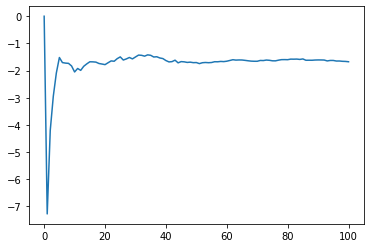

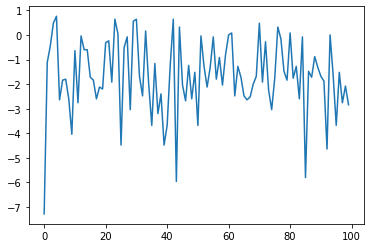

In [ ]:
z = standard_grid(0.8, -0.04)
a = Agent(z)
a.makeMove()

In [ ]:
(2,1) == (2,1)

True